In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [4]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_760679.tsv', sep='\t')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,HCT116,A549
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.018,-0.048,0.017,-0.708,NaN
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.043,0.191,0.099,-0.262,NaN
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.005,0.650,-0.185,0.627,NaN
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.762,0.281,0.676,NaN
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.455,-0.643,0.066,-0.164,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.716,1.309,1.089,NaN,NaN
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.544,-0.427,NaN,NaN
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.143,-0.195,-0.308,NaN,NaN
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.116,-0.084,-0.385,NaN,NaN


In [5]:
VEF_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_VEF_zscore.tsv', sep='\t')
VEF_df.describe()

,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
count,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000
mean,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,NaN,0.000,-0.000,-0.000,0.000,-0.000,NaN,-0.000,NaN,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,NaN,-0.000,0.000,-0.000,0.000,NaN,-0.000,NaN,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000
min,-3.071,-4.178,-4.665,-5.994,-5.530,-2.963,-1.741,-2.223,-2.539,-3.762,-4.128,-4.924,-4.987,-2.823,NaN,-2.453,-3.506,-4.290,-4.320,-3.525,NaN,-3.342,NaN,-2.462,-3.177,-2.987,-4.315,-3.715,-2.924,-2.844,NaN,-2.212,-3.474,-2.917,-3.403,NaN,-4.443,NaN,-3.275,-2.586
25%,-0.706,-0.689,-0.697,-0.625,-0.686,-0.747,-0.818,-0.673,-0.734,-0.721,-0.702,-0.700,-0.680,-0.782,NaN,-0.691,-0.682,-0.656,-0.645,-0.771,NaN,-0.782,NaN,-0.672,-0.687,-0.701,-0.686,-0.592,-0.721,-0.736,NaN,-0.627,-0.694,-0.677,-0.676,NaN,-0.692,NaN,-0.725,-0.677
50%,-0.202,-0.208,-0.205,-0.039,-0.102,-0.115,-0.316,-0.253,-0.210,-0.234,-0.183,-0.130,-0.071,-0.168,NaN,-0.212,-0.233,-0.248,-0.241,-0.136,NaN,-0.044,NaN,-0.240,-0.191,-0.259,-0.232,-0.175,-0.249,-0.159,NaN,-0.259,-0.145,-0.264,-0.243,NaN,-0.215,NaN,-0.193,-0.221
75%,0.493,0.481,0.495,0.573,0.594,0.641,0.613,0.392,0.543,0.525,0.527,0.636,0.626,0.658,NaN,0.467,0.483,0.388,0.380,0.700,NaN,0.754,NaN,0.412,0.456,0.444,0.448,0.361,0.493,0.619,NaN,0.317,0.497,0.395,0.423,NaN,0.512,NaN,0.561,0.420
max,6.455,5.184,5.623,6.448,4.656,4.533,3.655,8.456,5.766,6.191,6.044,4.098,4.231,4.624,NaN,8.384,5.613,6.558,6.388,4.103,NaN,4.445,NaN,8.475,7.113,6.104,7.072,6.734,4.692,4.500,NaN,9.919,6.630,6.189,6.035,NaN,4.868,NaN,6.659,8.890


In [6]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [7]:
data_split_dict = {}

data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)
data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test']  = MPRA_df['chr'].isin(['chr2'])

MPRA_df['std'] = MPRA_df[cell_types].std(axis=1, skipna=True)
threshold = np.percentile(MPRA_df['std'].dropna(), 98)
data_split_dict['diff']  = MPRA_df['std'] > threshold
data_split_dict['const'] = ~data_split_dict['diff']


for key in data_split_dict:
    print(key, data_split_dict[key].sum())

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}+{k2}'] = data_split_dict[k1] & data_split_dict[k2]

total 760679
train 631073
valid 70952
test 58654
diff 15214
const 745465


In [8]:
for cell_type in cell_types:

    promoter_df = MPRA_df[(VEF_df[f'{cell_type}_DNase'] > 0 ) & (VEF_df[f'{cell_type}_H3K4me3'] > 0 )]
    enhancer_df = MPRA_df[(VEF_df[f'{cell_type}_DNase'] > 0 ) & (VEF_df[f'{cell_type}_H3K27ac'] > 0 )]
    ctcfonly_df = MPRA_df[(VEF_df[f'{cell_type}_DNase'] > 0 ) & (VEF_df[f'{cell_type}_CTCF'] > 0 )]
    lowdnase_df = MPRA_df[(VEF_df[f'{cell_type}_DNase'] < 0 )]

    print(len(promoter_df), len(enhancer_df), len(ctcfonly_df), len(lowdnase_df))
    print(promoter_df[f'{cell_type}'].mean(), enhancer_df[f'{cell_type}'].mean(), ctcfonly_df[f'{cell_type}'].mean(), lowdnase_df[f'{cell_type}'].mean())

269950 273584 249815 447418
0.4836287489154977 0.478546764225983 0.4938555285110016 -0.28586131030087275
270346 279846 278761 443937
0.5034641194961855 0.4628897551731566 0.4463758171013135 -0.286109325596935
218379 210122 251041 456905
0.5463476693044746 0.5883006081035144 0.42625346654862656 -0.2174721071030272
248623 259715 244262 447140
0.4605862636212787 0.445588239676477 0.4268031142184161 -0.2626078992101346
243634 257271 266249 430095
0.4516463333536833 0.4272529204709249 0.34039454035132855 -0.17612141317346686


In [9]:
MPRA_df.describe()

,pos,K562,HepG2,SK-N-SH,HCT116,A549,std
count,760679.000,760679.000,760679.000,760679.000,448103.000,319496.000,760679.000
mean,75202958.598,-0.000,-0.000,0.000,0.000,-0.000,0.357
std,57521411.054,1.000,1.000,1.000,1.000,1.000,0.270
min,14677.000,-5.360,-5.745,-5.762,-5.956,-6.017,0.002
25%,28973267.000,-0.564,-0.597,-0.569,-0.567,-0.504,0.185
50%,62363640.000,-0.283,-0.256,-0.206,-0.272,-0.203,0.285
75%,112600466.000,0.206,0.284,0.285,0.208,0.215,0.441
max,249200985.000,7.854,7.705,8.315,7.761,11.771,3.998


221783
35898
9147
3122
5664
10239
13221
14187
10062
14813
5868
9108
1926
12448
22694
370499


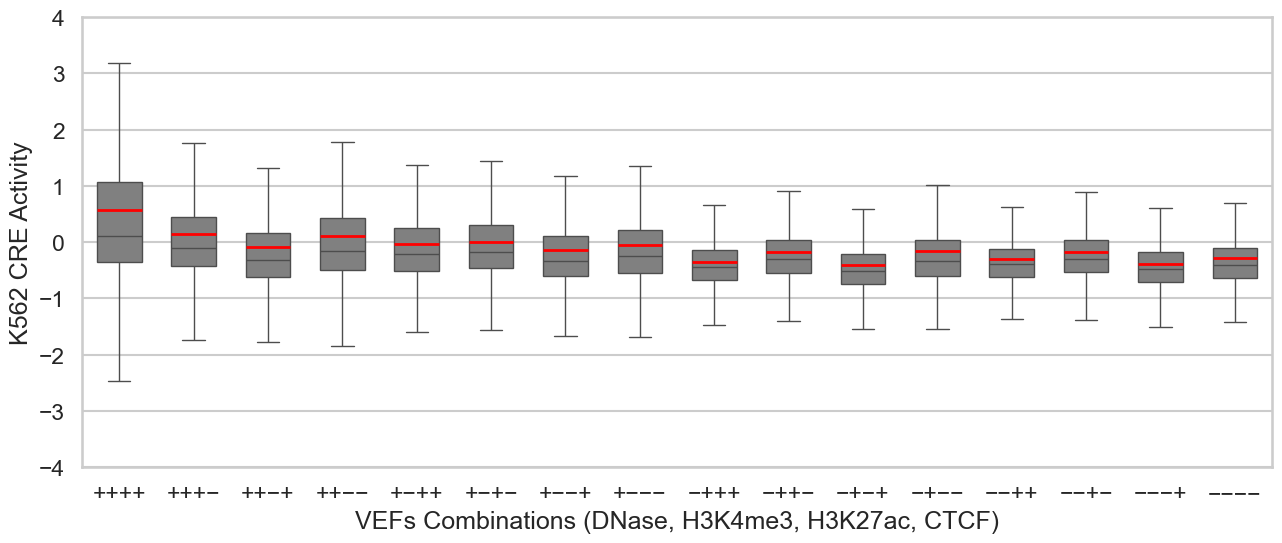

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

sns.set_theme(context='talk', style='whitegrid')

for cell_type in cell_types[:1]:
    fig, ax = plt.subplots(figsize=(14, 6), dpi=100)
    plt.subplots_adjust(left=0.1, bottom=0.15, right=0.95, top=0.9)

    marks = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
    conditions = list(itertools.product(["+", "-"], repeat=4))
    plot_data = []

    for cond in conditions:
        query = (
            (VEF_df[f"{cell_type}_DNase"] > 0 if cond[0] == "+" else VEF_df[f"{cell_type}_DNase"] < 0) &
            (VEF_df[f"{cell_type}_H3K4me3"] > 0 if cond[1] == "+" else VEF_df[f"{cell_type}_H3K4me3"] < 0) &
            (VEF_df[f"{cell_type}_H3K27ac"] > 0 if cond[2] == "+" else VEF_df[f"{cell_type}_H3K27ac"] < 0) &
            (VEF_df[f"{cell_type}_CTCF"] > 0 if cond[3] == "+" else VEF_df[f"{cell_type}_CTCF"] < 0)
        )
        subset = MPRA_df[query]
        print(len(subset))
        # 用 Unicode 负号让对齐更漂亮
        label = ''.join(['+' if c == '+' else '\u2212' for c in cond])
        if len(subset) > 0:
            plot_data.append(pd.DataFrame({
                "Activity": subset[f"{cell_type}"],
                "Group": label
            }))

    plot_df = pd.concat(plot_data, ignore_index=True)

    sns.boxplot(
        data=plot_df, x='Group', y='Activity',
        color='gray', fliersize=0, width=0.6, ax=ax, 
        showmeans=True,
        meanline=True,       # 让均值显示为线
        meanprops={"color": "red", "lw": 2, "ls": "-"}  # 可定制样式
    )

    ax.set_xlabel('VEFs Combinations (DNase, H3K4me3, H3K27ac, CTCF)')
    ax.set_ylabel(f'{cell_type} CRE Activity')
    ax.set_ylim(-4, 4)

    plt.savefig(f'figures/{cell_type}_16state_CRE_activity_boxplot.png', dpi=400)
    plt.savefig(f'figures_pdf/{cell_type}_16state_CRE_activity_boxplot.pdf', dpi=400)
    plt.show()